<a href="https://colab.research.google.com/github/DeepakKumarSingh003/-Demand-Prediction-for-Public-Transport-Movement-in-Nirobi/blob/main/Copy_of_Demand_Prediction_for_Public_Transport_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

In [140]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
plt.style.use('fivethirtyeight')

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [325]:
df = pd.read_csv("/content/drive/MyDrive/Alma better Projects/Regression ML-Demand prediction/train_revised.csv")

In [326]:
df.shape

(51645, 10)

In [327]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [328]:
df.travel_time.unique()

array(['7:15', '7:12', '7:05', '7:10', '7:09', '5:10', '9:50', '7:06',
       '6:00', '5:50', '10:58', '6:50', '5:30', '6:40', '9:10', '5:00',
       '5:20', '10:52', '10:50', '10:51', '8:20', '19:03', '7:02', '6:30',
       '7:20', '7:04', '19:05', '19:04', '6:59', '7:08', '5:40', '9:00',
       '7:14', '7:07', '8:00', '7:30', '10:57', '8:30', '11:01', '7:11',
       '7:03', '6:58', '11:05', '10:20', '10:53', '10:00', '8:50',
       '10:54', '7:01', '7:00', '6:10', '6:20', '10:10', '11:02', '9:40',
       '9:30', '7:50', '10:56', '10:55', '10:40', '10:30', '9:20', '8:40',
       '8:10', '7:40', '7:13', '11:00', '11:04', '19:06', '10:59',
       '11:07', '11:06', '11:03', '19:07', '11:08', '11:09', '23:09',
       '23:10'], dtype=object)

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


#Generate Target Variable

In [330]:
ride_id_dict = {} 
for ride_id in df["ride_id"]:
    if not ride_id in ride_id_dict:
        ride_id_dict[ride_id] = 1
    else:
        ride_id_dict[ride_id] += 1

In [331]:
df.drop(['seat_number','payment_method','payment_receipt','travel_to'], axis=1,inplace=True)

In [332]:
df.drop_duplicates(inplace=True)
df.reset_index(drop= True, inplace=True)

In [333]:
for i in range(len(df)):
    ride_id = df.loc[i]["ride_id"]
    df.at[i,"Tickets"] = ride_id_dict[ride_id]

#Feature Engineering

In [334]:
df.head()


,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,Tickets
0,1442,17-10-17,7:15,Migori,Bus,49,1.0
1,5437,19-11-17,7:12,Migori,Bus,49,1.0
2,5710,26-11-17,7:05,Keroka,Bus,49,1.0
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5.0
4,5778,27-11-17,7:12,Migori,Bus,49,31.0


**Extracting year Month Days week**

In [335]:
df['year'] = pd.DatetimeIndex(df['travel_date']).year
df['month'] = pd.DatetimeIndex(df['travel_date']).month
df['day'] = pd.DatetimeIndex(df['travel_date']).day
df['week'] = pd.DatetimeIndex(df['travel_date']).week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  after removing the cwd from sys.path.


In [336]:
df["travel_date"] = pd.to_datetime(df["travel_date"],infer_datetime_format=True)

#change the full date to day of week
df["day_ofweek"] = df["travel_date"].dt.dayofweek

In [337]:
print(df.shape)
df.sample(5)

(6249, 12)


,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,Tickets,year,month,day,week,day_ofweek
1054,7343,2018-02-28,19:07,Kisii,Bus,49,1.0,2018,2,28,9,2
916,7165,2017-12-12,7:13,Rongo,Bus,49,2.0,2017,12,12,50,1
4906,12161,2018-03-13,7:03,Rongo,Bus,49,5.0,2018,3,13,11,1
5673,13101,2018-06-04,7:12,Awendo,Bus,49,9.0,2018,6,4,23,0
453,6598,2017-05-12,7:12,Migori,Bus,49,25.0,2017,5,12,19,4


In [338]:
#drop travel date and ride id
df.drop(["travel_date","ride_id","year","max_capacity"],axis=1, inplace=True)

In [339]:
#express travel time in minutes
df["Time"] = df["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
df.drop(["travel_time"],axis=1,inplace=True)


In [340]:
df.head()

,travel_from,car_type,Tickets,month,day,week,day_ofweek,Time
0,Migori,Bus,1.0,10,17,42,1,435
1,Migori,Bus,1.0,11,19,46,6,432
2,Keroka,Bus,1.0,11,26,47,6,425
3,Homa Bay,Bus,5.0,11,27,48,0,430
4,Migori,Bus,31.0,11,27,48,0,432


In [341]:
def calculate_time_period(travel_time_In_minutes):
    time_period = travel_time_In_minutes / 60
    return time_period

df['Time'] = np.ceil(df.Time.apply(calculate_time_period))

In [342]:
df.head()

,travel_from,car_type,Tickets,month,day,week,day_ofweek,Time
0,Migori,Bus,1.0,10,17,42,1,8.0
1,Migori,Bus,1.0,11,19,46,6,8.0
2,Keroka,Bus,1.0,11,26,47,6,8.0
3,Homa Bay,Bus,5.0,11,27,48,0,8.0
4,Migori,Bus,31.0,11,27,48,0,8.0


In [343]:
bins = [0, 9, 18, 24]
names = ['morning', 'day', 'night']
df['periods'] = pd.cut(df.Time, bins, labels=names)

In [344]:
df.head()

,travel_from,car_type,Tickets,month,day,week,day_ofweek,Time,periods
0,Migori,Bus,1.0,10,17,42,1,8.0,morning
1,Migori,Bus,1.0,11,19,46,6,8.0,morning
2,Keroka,Bus,1.0,11,26,47,6,8.0,morning
3,Homa Bay,Bus,5.0,11,27,48,0,8.0,morning
4,Migori,Bus,31.0,11,27,48,0,8.0,morning


# Outliers

**Target Variable**

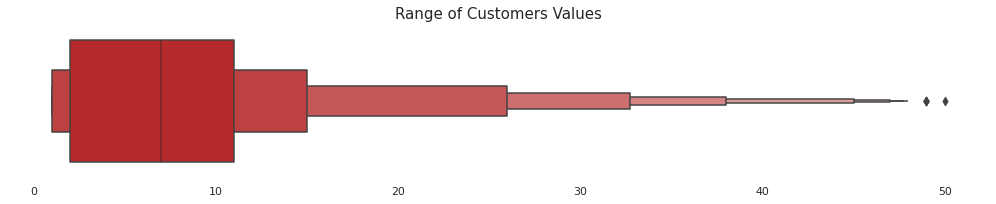

In [345]:
sns.set_theme(rc={'figure.figsize': (14,3)},style='whitegrid')
sns.boxenplot(x=df['Tickets'],color='#CC1313')
plt.grid(False)
plt.xlabel('')
plt.title('Range of Customers Values',size=15)
ax = plt.gca()
for spine in ax.spines.values():
   spine.set_visible(False)

In [346]:
def out_iqr(df , column):
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    perc=(df1.shape[0]+ df2.shape[0]/len(df[column]))
    return print('Total number of outliers are',df1.shape[0]+ df2.shape[0],"In percentage",((df1.shape[0]+ df2.shape[0])*100/len(df[column])))
          

In [347]:
out_iqr(df,"Tickets")

The IQR is 9.0
The lower bound value is -11.5
The upper bound value is 24.5
Total number of outliers are 420 In percentage 6.72107537205953


In [348]:
df[df.Tickets>=30]

,travel_from,car_type,Tickets,month,day,week,day_ofweek,Time,periods
4,Migori,Bus,31.0,11,27,48,0,8.0,morning
441,Kisii,Bus,31.0,12,3,49,0,20.0,night
573,Migori,Bus,33.0,6,12,24,0,8.0,morning
596,Migori,Bus,33.0,7,12,28,2,8.0,morning
623,Migori,Bus,31.0,7,12,28,2,8.0,morning
...,...,...,...,...,...,...,...,...,...
6186,Migori,Bus,34.0,4,19,16,3,8.0,morning
6188,Homa Bay,Bus,33.0,4,19,16,3,8.0,morning
6218,Sirare,Bus,39.0,4,20,16,4,20.0,night
6220,Homa Bay,Bus,30.0,4,20,16,4,8.0,morning


In [349]:
df["Tickets"].skew()

2.055324253303991

**Quantile-based Capping**

In [350]:
df["Tickets"].quantile(0.90)

19.0

In [351]:
df["Tickets"] = np.where(df["Tickets"] >25, 19,df['Tickets'])
df.Tickets.skew()

0.8283312514431329

In [352]:
df['Tickets']=df["Tickets"].astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


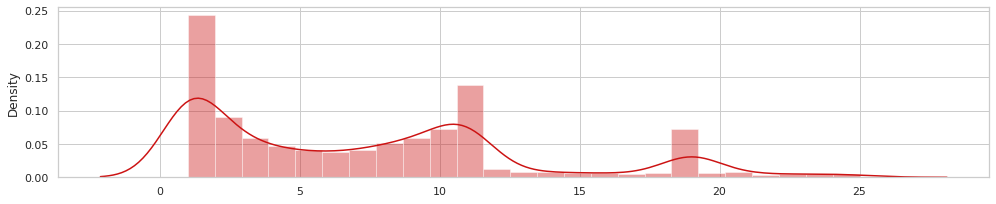

In [353]:
# df.Tickets.
sns.distplot(x=df['Tickets'],color='#CC1313')
plt.show()

In [354]:
df.describe()

,Tickets,month,day,week,day_ofweek,Time
count,6249.000000,6249.000000,6249.000000,6249.000000,6249.000000,6249.000000
mean,7.307569,5.761402,13.832133,22.979677,2.913906,8.838214
std,5.980239,4.076164,9.301234,17.415602,1.958013,2.988439
min,1.000000,1.000000,1.000000,1.000000,0.000000,5.000000
25%,2.000000,2.000000,3.000000,8.000000,1.000000,8.000000
50%,7.000000,4.000000,14.000000,16.000000,3.000000,8.000000
75%,11.000000,10.000000,21.000000,40.000000,5.000000,9.000000
max,25.000000,12.000000,31.000000,52.000000,6.000000,24.000000


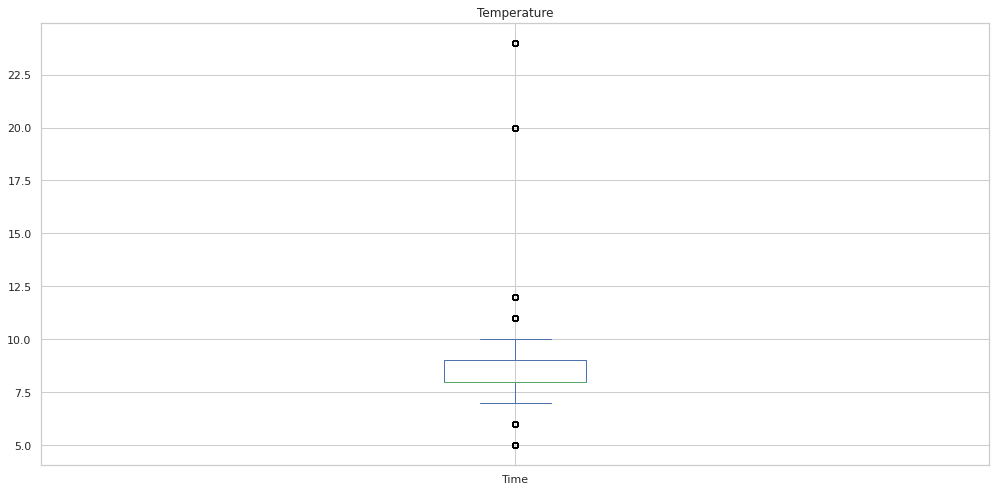

In [355]:
# Set the figure size
plt.rcParams["figure.figsize"] = [14 ,7]
plt.rcParams["figure.autolayout"] = True


# Plot the dataframe
ax = df["Time"].plot(kind='box', title='Temperature')

# Display the plot
plt.show()

#EDA

**Univariate Analysis**

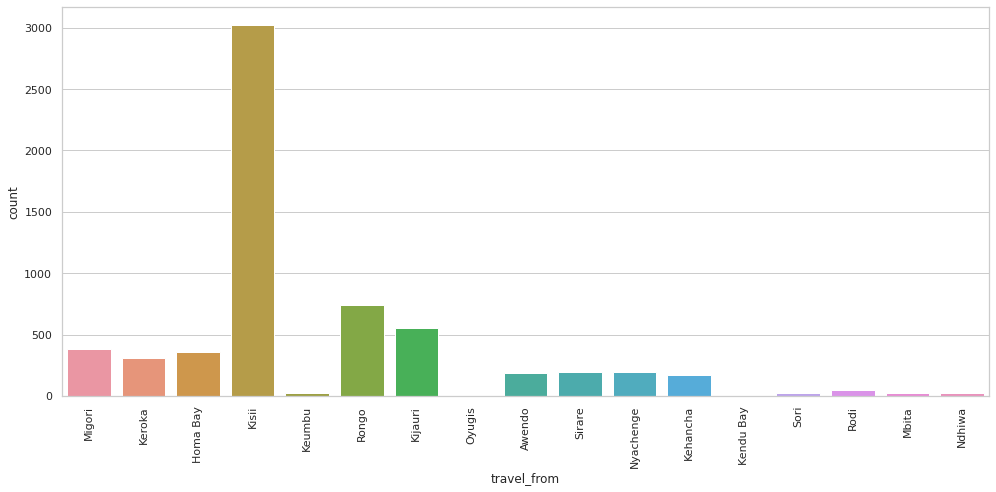

In [356]:
sns.countplot(x="travel_from", data=df)
plt.xticks(rotation=90)
plt.show()


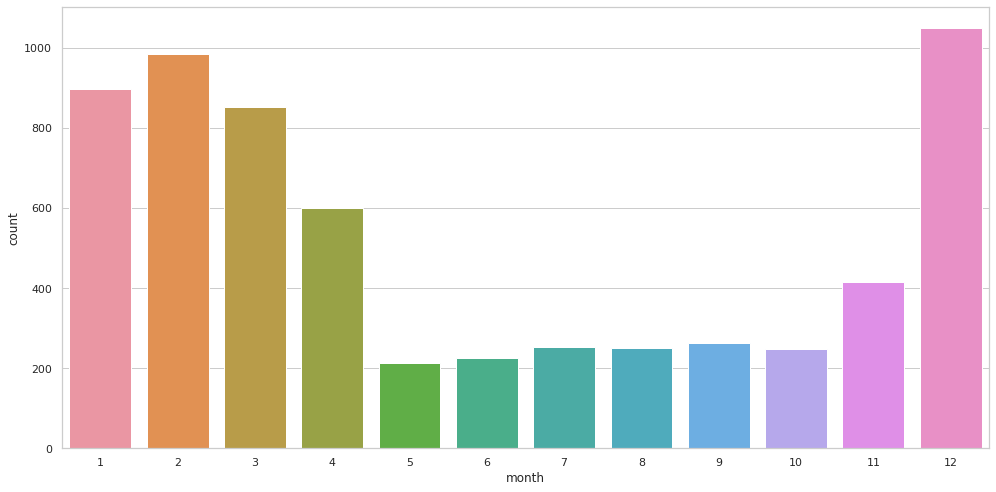

In [357]:
sns.countplot(x="month", data=df)
plt.show()

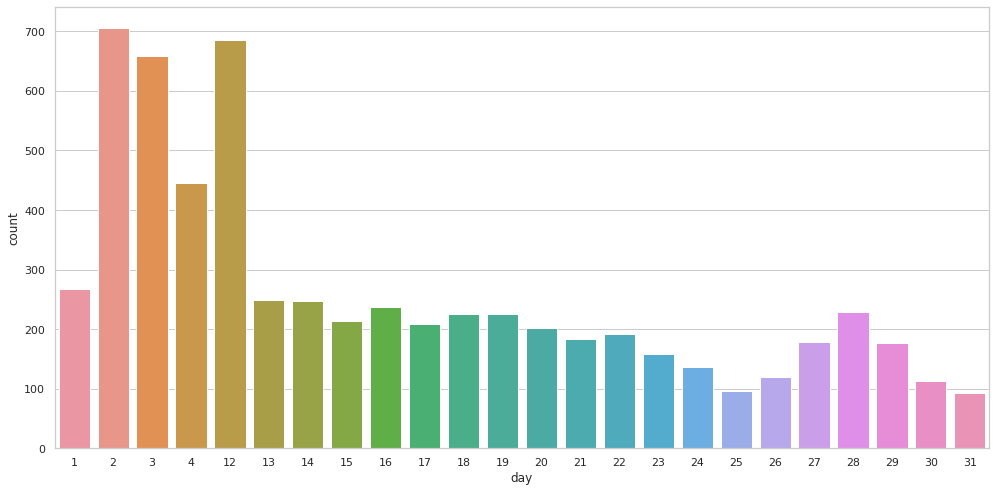

In [358]:
sns.countplot(x="day", data=df)
plt.show()

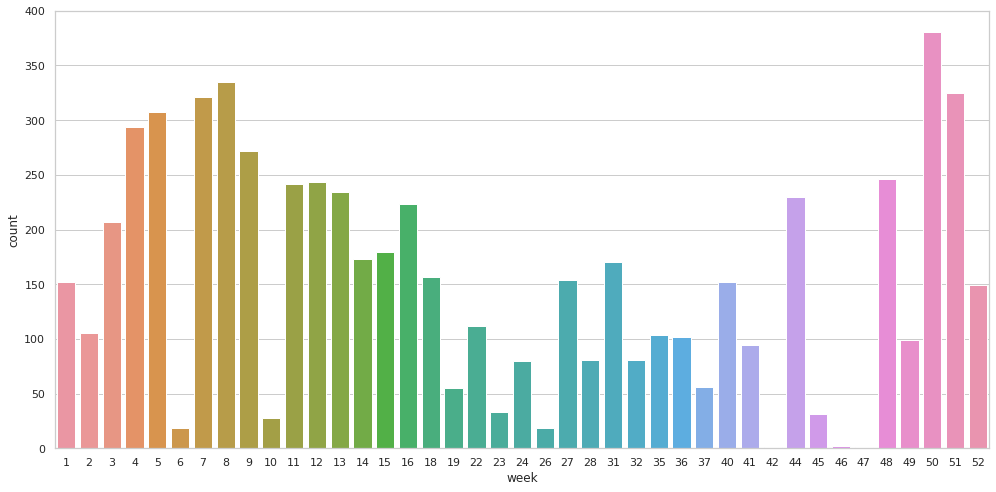

In [359]:
sns.countplot(x="week", data=df)
plt.show()

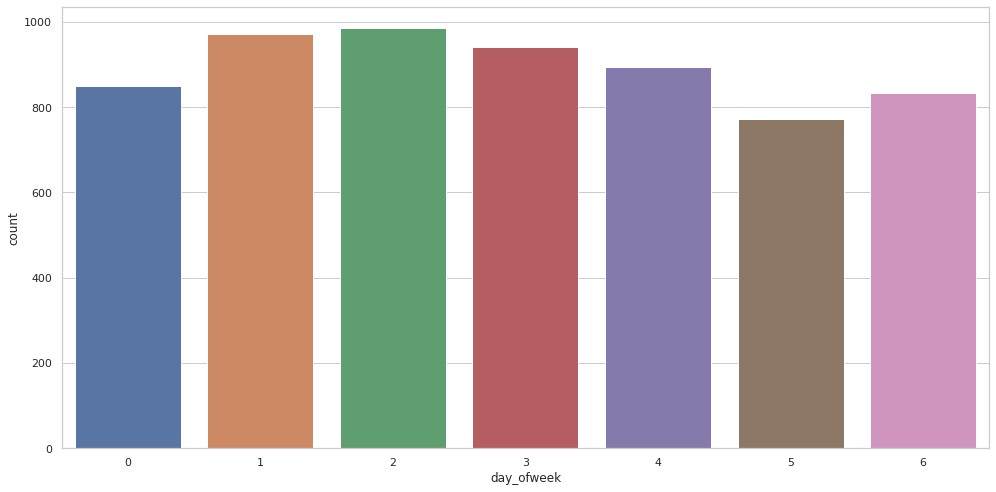

In [360]:
sns.countplot(x="day_ofweek", data=df)
plt.show()

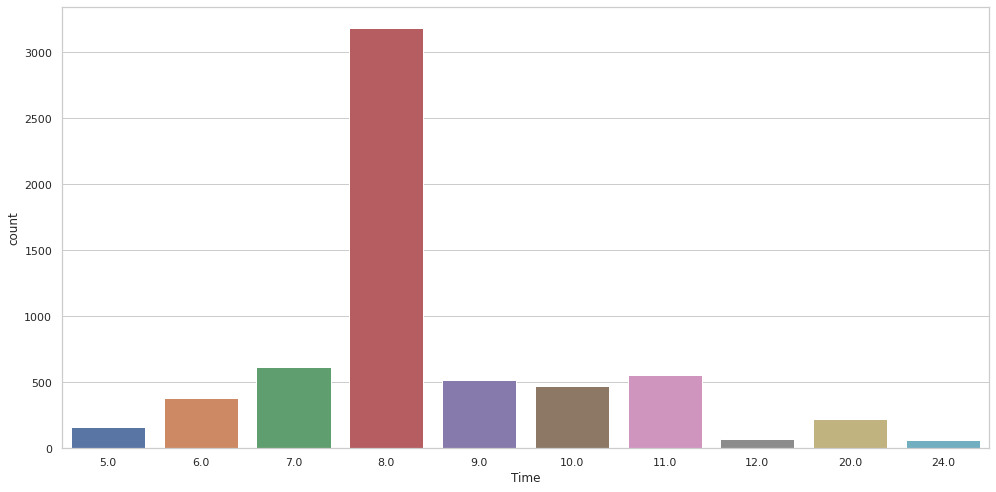

In [361]:
sns.countplot(x="Time", data=df)
plt.show()

**Bivariate Analysis**

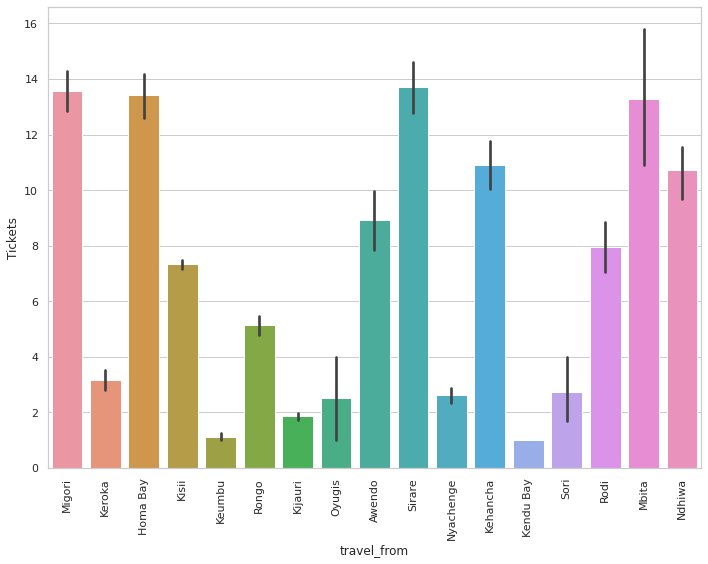

In [362]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (10,8)},style='whitegrid')
sns.barplot(x = 'travel_from',
            y = 'Tickets',
            data = df)
plt.xticks(rotation=90) 
# Show the plot
plt.show()

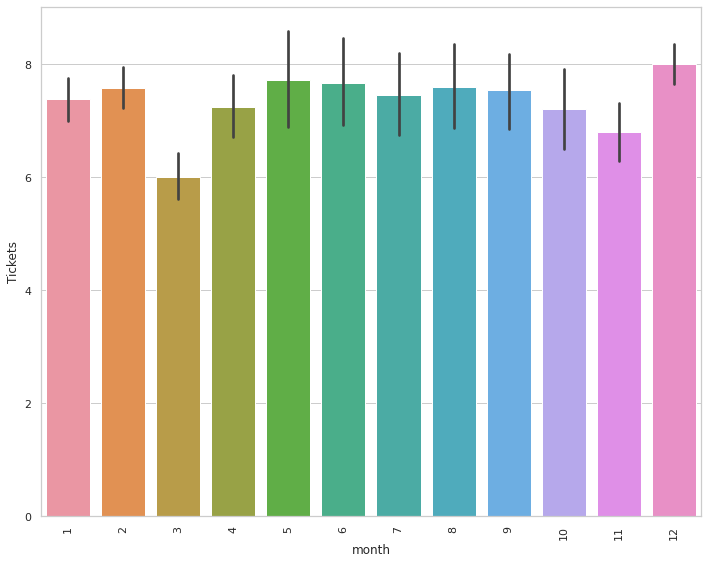

In [363]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (10,8)},style='whitegrid')
sns.barplot(x = 'month',
            y = 'Tickets',
            data = df)
plt.xticks(rotation=90) 
# Show the plot
plt.show()

In [364]:
df.columns

Index(['travel_from', 'car_type', 'Tickets', 'month', 'day', 'week',
       'day_ofweek', 'Time', 'periods'],
      dtype='object')

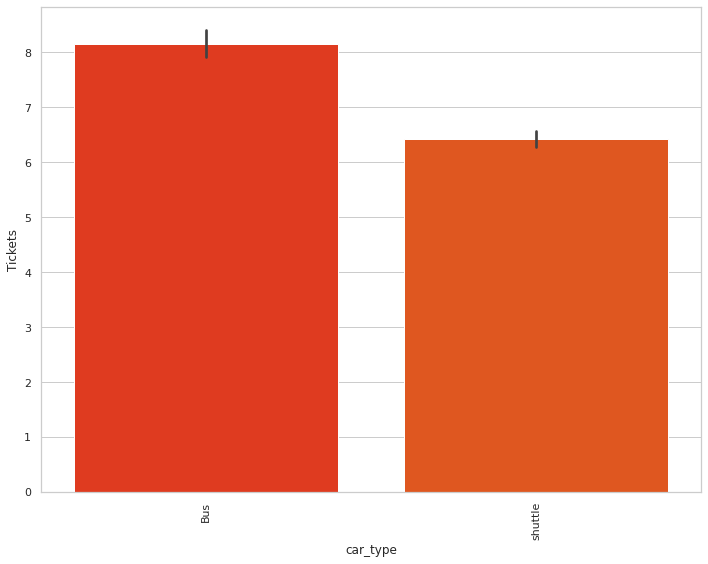

In [365]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (10,8)},style='whitegrid')
sns.barplot(x = 'car_type',
            y = 'Tickets',
            data = df)
plt.xticks(rotation=90) 
# Show the plot
plt.show()

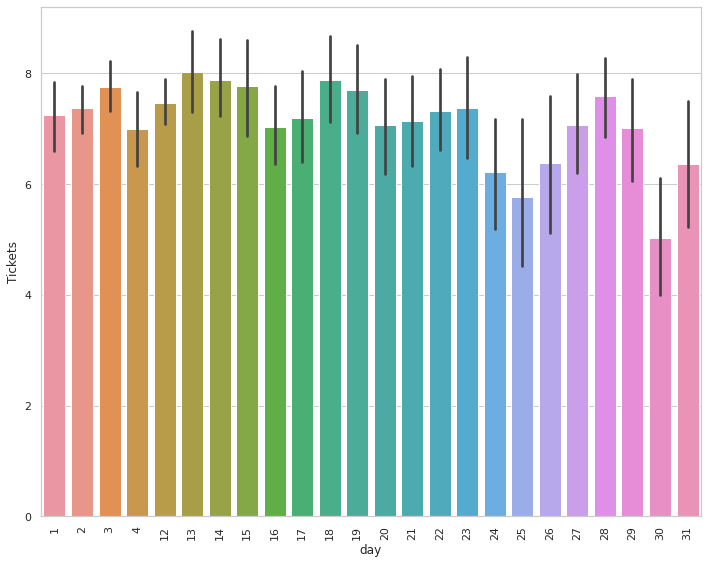

In [366]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (10,8)},style='whitegrid')
sns.barplot(x = 'day',
            y = 'Tickets',
            data = df)
plt.xticks(rotation=90) 
# Show the plot
plt.show()

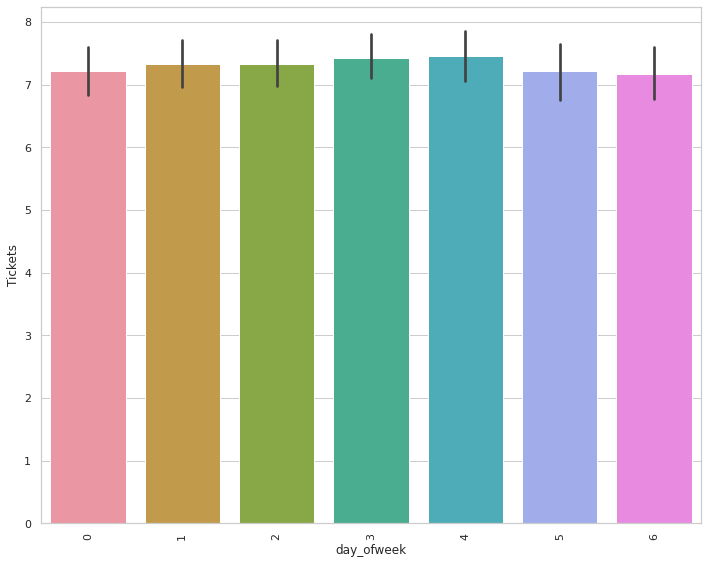

In [367]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (10,8)},style='whitegrid')
sns.barplot(x = 'day_ofweek',
            y = 'Tickets',
            data = df)
plt.xticks(rotation=90) 
# Show the plot
plt.show()

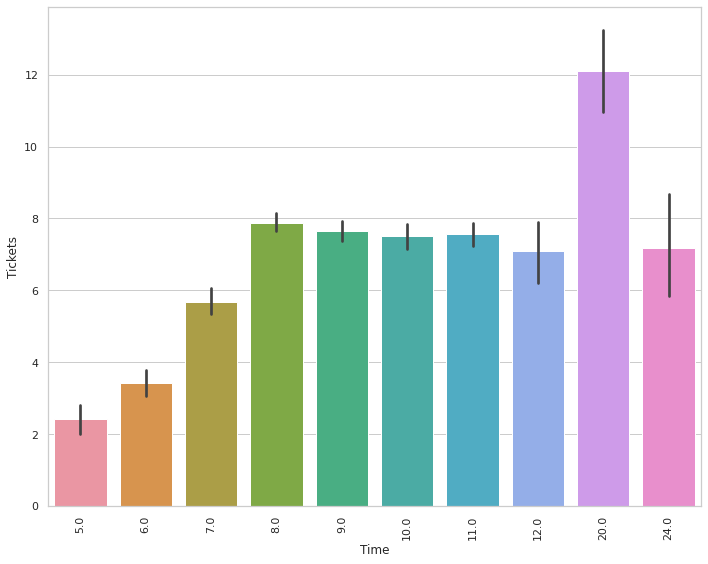

In [368]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (10,8)},style='whitegrid')
sns.barplot(x = 'Time',
            y = 'Tickets',
            data = df)
plt.xticks(rotation=90) 
# Show the plot
plt.show()

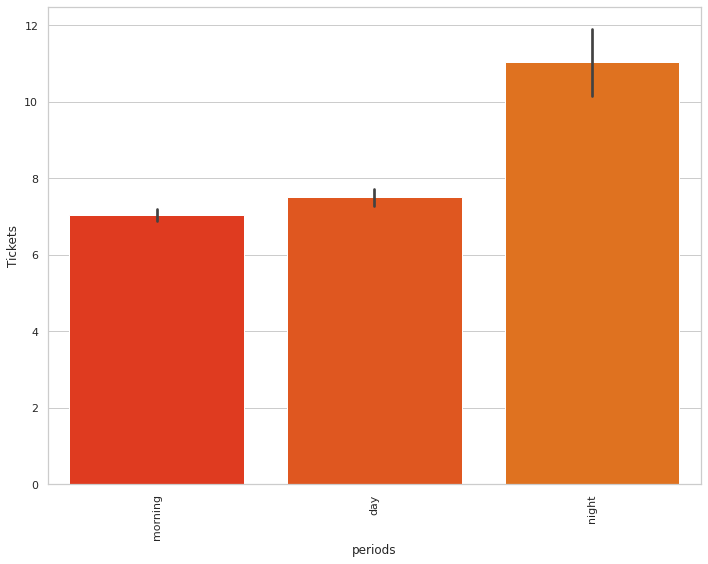

In [369]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (10,8)},style='whitegrid')
sns.barplot(x = 'periods',
            y = 'Tickets',
            data = df)
plt.xticks(rotation=90) 
# Show the plot
plt.show()

**Mulyivariate analysis**

In [370]:
df.columns

Index(['travel_from', 'car_type', 'Tickets', 'month', 'day', 'week',
       'day_ofweek', 'Time', 'periods'],
      dtype='object')

In [371]:
df2.columns

Index(['Tickets', 'month', 'day', 'week', 'day_ofweek', 'car_type_shuttle',
       'periods_day', 'periods_night', 'Homa Bay', 'Keroka', 'Kijauri',
       'Kisii', 'Migori', 'Nyachenge', 'Rongo', 'Sirare'],
      dtype='object')

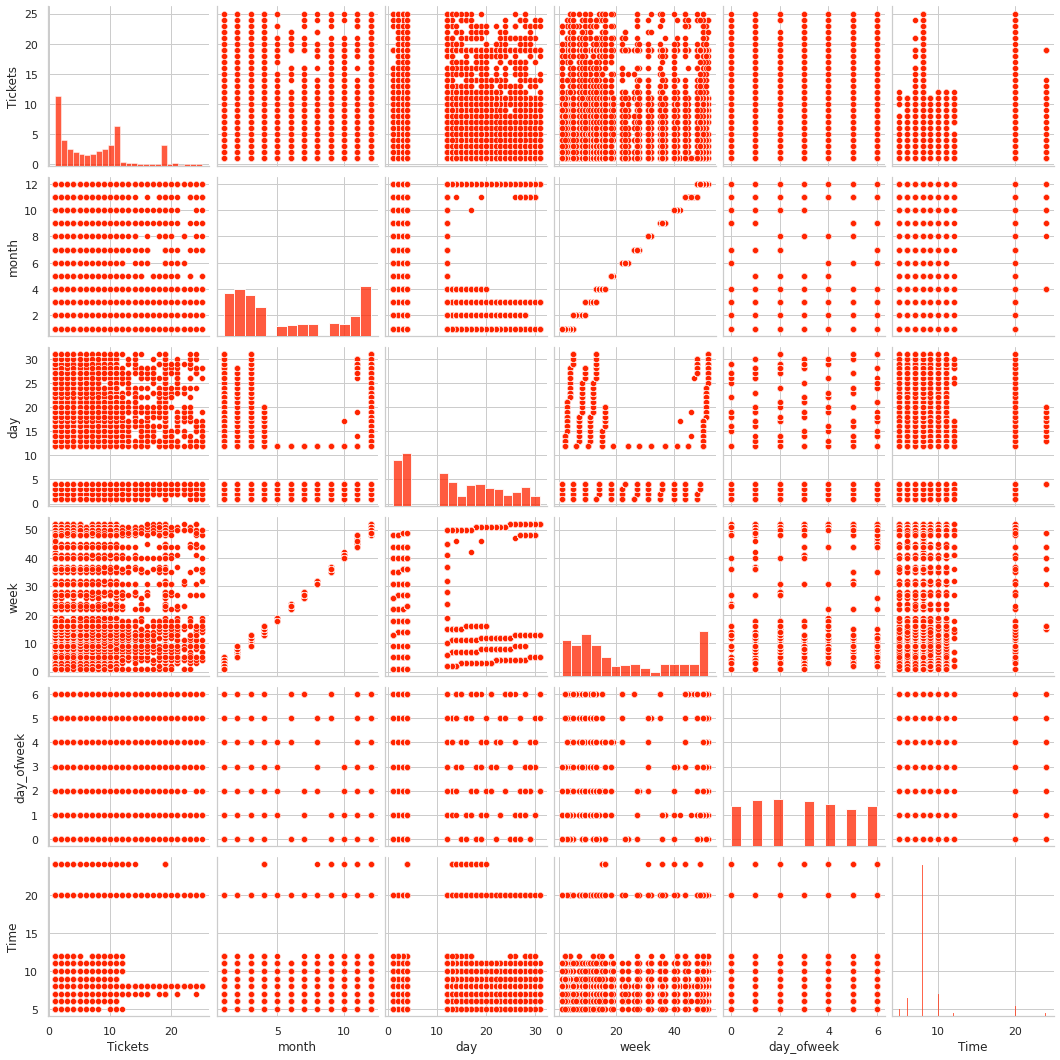

In [373]:

# visualize the relationship between the features and the response using scatterplots
Plot=df[['travel_from', 'car_type', 'Tickets', 'month', 'day', 'week',
       'day_ofweek', 'Time', 'periods']]
sns.pairplot(Plot)
plt.show()

In [374]:
df.columns

Index(['travel_from', 'car_type', 'Tickets', 'month', 'day', 'week',
       'day_ofweek', 'Time', 'periods'],
      dtype='object')

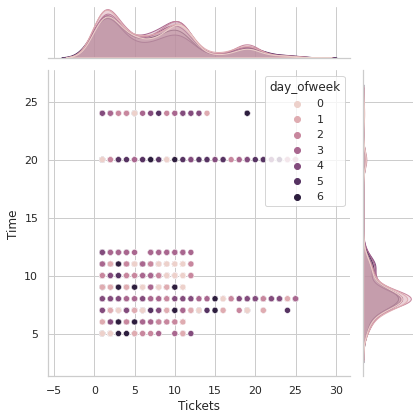

In [375]:
sns.jointplot(data=df, x="Tickets", y="Time", hue="day_ofweek")
plt.show()

**Nominal Encoding(one hot encoding)**

In [376]:
one_hot = pd.get_dummies(df["travel_from"],drop_first=True)
 

In [377]:
one_hot.columns

Index(['Homa Bay', 'Kehancha', 'Kendu Bay', 'Keroka', 'Keumbu', 'Kijauri',
       'Kisii', 'Mbita', 'Migori', 'Ndhiwa', 'Nyachenge', 'Oyugis', 'Rodi',
       'Rongo', 'Sirare', 'Sori'],
      dtype='object')

#Finding Important Features¶
We're going to let scikit-learn help us determine which variables are the best at predicting number of tickets using RandomForest.

In [378]:
from sklearn.ensemble import RandomForestClassifier

features = np.array(one_hot.columns)
clf = RandomForestClassifier(n_estimators=10)
clf.fit(one_hot, df["Tickets"])

RandomForestClassifier(n_estimators=10)

In [379]:
# from the calculated importances, order them from most to least important
# and make a barplot so we can visualize what is/isn't important
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

In [380]:
importances

array([0.09311031, 0.0297897 , 0.00172158, 0.07618856, 0.02564828,
       0.2071268 , 0.26854833, 0.01285679, 0.09131206, 0.01710052,
       0.02727383, 0.00304858, 0.01308291, 0.04118312, 0.08414318,
       0.00786545])

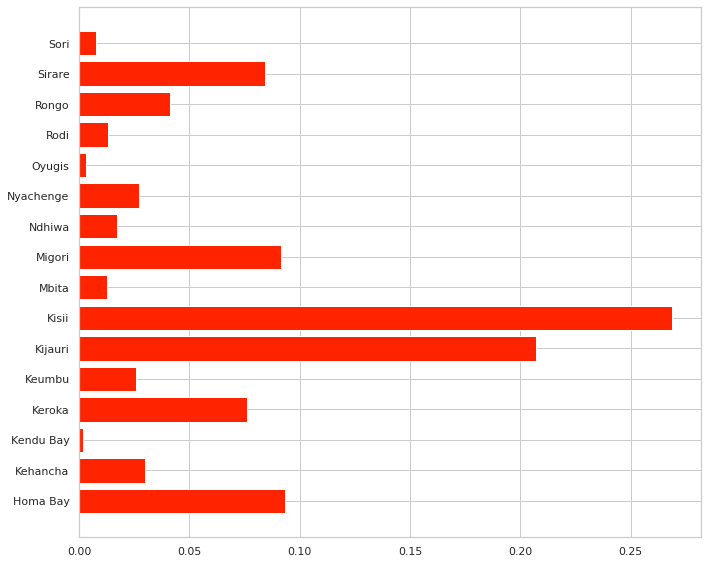

In [381]:
plt.barh(one_hot.columns, clf.feature_importances_)
plt.show()

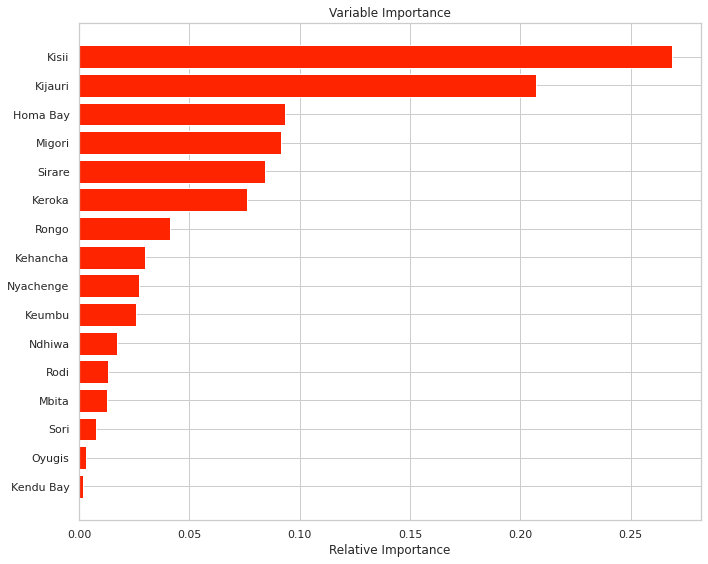

In [382]:
padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

In [383]:
one_hot_imp=one_hot.copy()

In [385]:
one_hot_imp=one_hot[['Homa Bay', 'Keroka',  'Kijauri',
       'Kisii', 'Migori', 'Nyachenge',
       'Rongo', 'Sirare']]

In [304]:
one_hot_imp.head()


,Homa Bay,Keroka,Kijauri,Kisii,Migori,Nyachenge,Rongo,Sirare
0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0


In [306]:
display(df,one_hot_imp)

,travel_from,car_type,Tickets,month,day,week,day_ofweek,Time,periods
0,Migori,Bus,1,10,17,42,1,8.0,morning
1,Migori,Bus,1,11,19,46,6,8.0,morning
2,Keroka,Bus,1,11,26,47,6,8.0,morning
3,Homa Bay,Bus,5,11,27,48,0,8.0,morning
4,Migori,Bus,19,11,27,48,0,8.0,morning
...,...,...,...,...,...,...,...,...,...
6244,Ndhiwa,Bus,11,4,20,16,4,24.0,night
6245,Ndhiwa,Bus,11,4,20,16,4,8.0,morning
6246,Rongo,Bus,1,4,20,16,4,8.0,morning
6247,Awendo,Bus,1,4,20,16,4,8.0,morning


,Homa Bay,Keroka,Kijauri,Kisii,Migori,Nyachenge,Rongo,Sirare
0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
6244,0,0,0,0,0,0,0,0
6245,0,0,0,0,0,0,0,0
6246,0,0,0,0,0,0,1,0
6247,0,0,0,0,0,0,0,0


In [386]:
df2 = pd.concat([df, one_hot_imp], axis=1)
df2.drop(["travel_from","Time"],axis=1,inplace=True)

In [387]:
df2.head()

,car_type,Tickets,month,day,week,day_ofweek,periods,Homa Bay,Keroka,Kijauri,Kisii,Migori,Nyachenge,Rongo,Sirare
0,Bus,1,10,17,42,1,morning,0,0,0,0,1,0,0,0
1,Bus,1,11,19,46,6,morning,0,0,0,0,1,0,0,0
2,Bus,1,11,26,47,6,morning,0,1,0,0,0,0,0,0
3,Bus,5,11,27,48,0,morning,1,0,0,0,0,0,0,0
4,Bus,19,11,27,48,0,morning,0,0,0,0,1,0,0,0


In [388]:
df2 = pd.get_dummies(df2, columns=["car_type","periods"],drop_first=True)

In [389]:
df2.head()

,Tickets,month,day,week,day_ofweek,Homa Bay,Keroka,Kijauri,Kisii,Migori,Nyachenge,Rongo,Sirare,car_type_shuttle,periods_day,periods_night
0,1,10,17,42,1,0,0,0,0,1,0,0,0,0,0,0
1,1,11,19,46,6,0,0,0,0,1,0,0,0,0,0,0
2,1,11,26,47,6,0,1,0,0,0,0,0,0,0,0,0
3,5,11,27,48,0,1,0,0,0,0,0,0,0,0,0,0
4,19,11,27,48,0,0,0,0,0,1,0,0,0,0,0,0


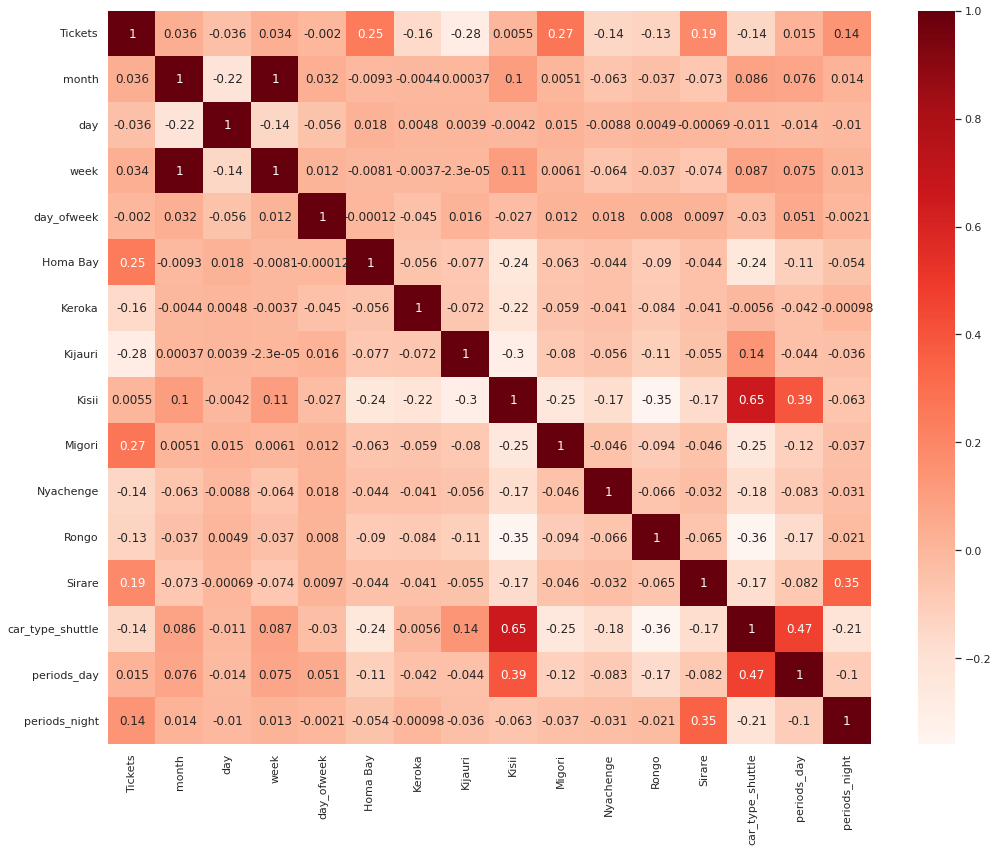

In [390]:
#Using Pearson Correlation
plt.figure(figsize=(15,12))
cor =df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Train Test Split

In [391]:
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
y = df2['Tickets']
X = df2.drop(['Tickets'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [393]:
X_train.shape, X_test.shape

((4999, 15), (1250, 15))

#Ml Models

In [401]:
from sklearn import svm
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [396]:
from sklearn import metrics

#Evaluate matrices
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square


In [394]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression(normalize=True)
LR_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [397]:
test_pred = LR_model.predict(X_test)
train_pred = LR_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3.87276997122707
MSE: 24.670418259150935
RMSE: 4.966932479826048
R2 Square 0.31787881127049467
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.8826594299726684
MSE: 24.44515553667483
RMSE: 4.94420423695005
R2 Square 0.3143903983506807
__________________________________


In [402]:
#Train the XGboost Model for Classification
model = xgb.XGBClassifier(n_estimators=100, 
                          max_depth=8, 
                          learning_rate=0.1, 
                          subsample=0.5)

In [403]:
model.fit(X_train, y_train)

XGBClassifier(max_depth=8, objective='multi:softprob', subsample=0.5)

In [404]:
preds_train_set = model.predict(X_test)

In [405]:
print (mean_absolute_error(preds_train_set,y_test))

4.012


**Decision Tree**

In [406]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor()
DT_model.fit(X_train,y_train)


DecisionTreeRegressor()

In [407]:
test_pred = DT_model.predict(X_test)
train_pred = DT_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3.794735595766462
MSE: 32.22382060350675
RMSE: 5.676602910500852
R2 Square 0.10903209728448116
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.491221948975543
MSE: 14.245559451829063
RMSE: 3.774329006834071
R2 Square 0.6004569360834278
__________________________________
